In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## Defining a simple feedforward neural network

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 28 * 28 is the size of the input vector; 128 units, which is the size of the output vector from this layer
        self.layer1 = nn.Linear(28 * 28, 128)  #first hidden layer
        self.layer2 = nn.Linear(128, 64)    #second hidden layer
        self.output = nn.Linear(64, 10)

# defines the computation that occurs for an input tensor x as it passes through the network layers
# ReLU: for activation functions in intermediate layers to enable the model to learn non-linear decision boundaries
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

## Loading MNIST dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

## Initializing neural network, loss function and optimizer and Training

In [14]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()    #updates the model's parameters based on these gradients to minimize the loss

            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

# Train the model
train(model, train_loader, criterion, optimizer)

# Evaluate the model on test data
test_dataset = datasets.MNIST('.', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

def evaluate(model, test_loader):
    model.eval()  # Set the model in evaluation mode
    correct = 0
    with torch.no_grad():  # Disable gradient calculation for evaluation
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Test set: Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')

evaluate(model, test_loader)

Epoch: 0 [0/60000] Loss: 2.307294
Epoch: 0 [6400/60000] Loss: 0.342019
Epoch: 0 [12800/60000] Loss: 0.271565
Epoch: 0 [19200/60000] Loss: 0.316795
Epoch: 0 [25600/60000] Loss: 0.169816
Epoch: 0 [32000/60000] Loss: 0.109472
Epoch: 0 [38400/60000] Loss: 0.102351
Epoch: 0 [44800/60000] Loss: 0.084267
Epoch: 0 [51200/60000] Loss: 0.133364
Epoch: 0 [57600/60000] Loss: 0.264849
Epoch: 1 [0/60000] Loss: 0.177340
Epoch: 1 [6400/60000] Loss: 0.077947
Epoch: 1 [12800/60000] Loss: 0.245567
Epoch: 1 [19200/60000] Loss: 0.020197
Epoch: 1 [25600/60000] Loss: 0.131403
Epoch: 1 [32000/60000] Loss: 0.105964
Epoch: 1 [38400/60000] Loss: 0.057655
Epoch: 1 [44800/60000] Loss: 0.109534
Epoch: 1 [51200/60000] Loss: 0.174816
Epoch: 1 [57600/60000] Loss: 0.046405
Epoch: 2 [0/60000] Loss: 0.107077
Epoch: 2 [6400/60000] Loss: 0.010265
Epoch: 2 [12800/60000] Loss: 0.122249
Epoch: 2 [19200/60000] Loss: 0.077449
Epoch: 2 [25600/60000] Loss: 0.082976
Epoch: 2 [32000/60000] Loss: 0.052385
Epoch: 2 [38400/60000] Loss

## Visualizing

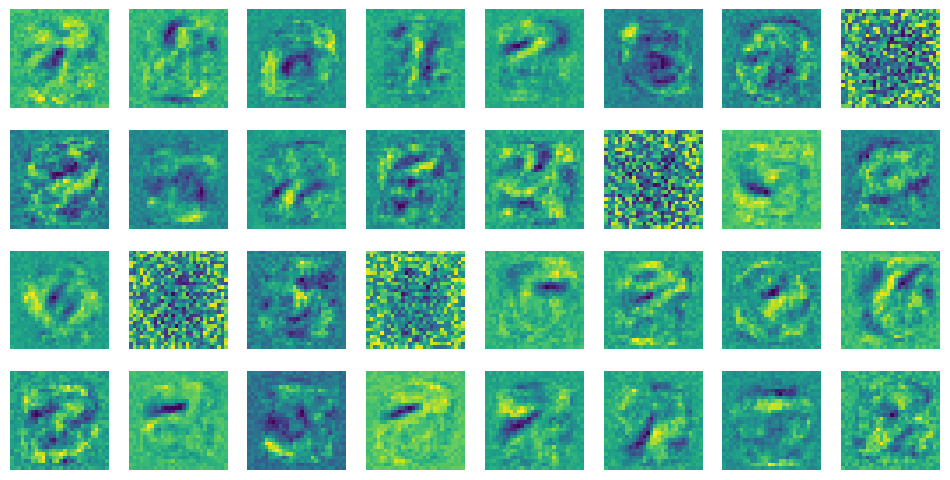

In [ ]:
# single-layer's weights as images
# provide a representative insight into what the network might be learning
def visualize_weights(model):
    # assuming we want to visualize the weights from the first layer
    weights = model.layer1.weight.data.view(-1, 28, 28)
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < weights.shape[0]:
            ax.imshow(weights[i].cpu(), cmap='viridis')
        ax.axis('off')
    plt.show()

# weights learned by the first layer
visualize_weights(model)

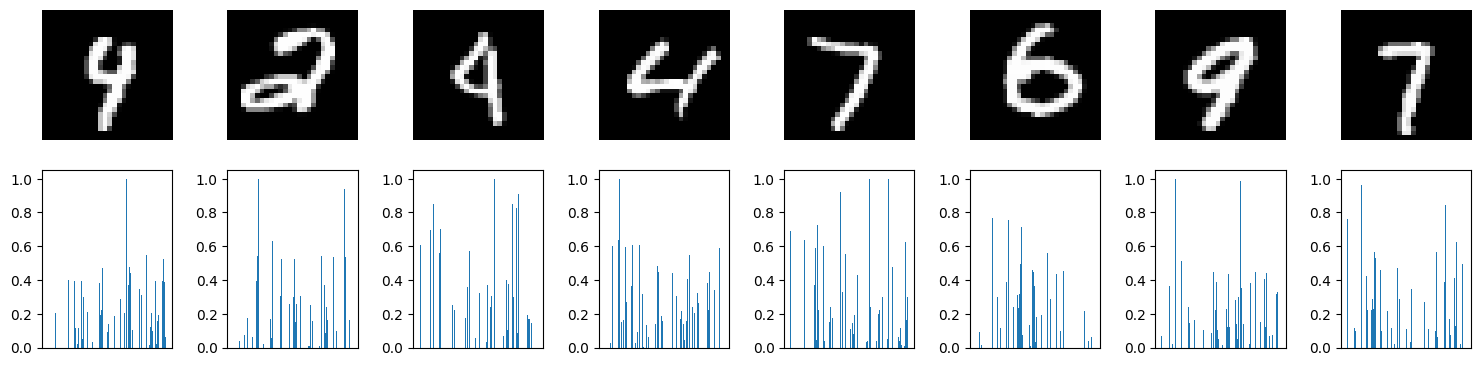

In [ ]:
# learned representations for a sample batch
def view_representation(model, data):
    model.eval()  # set to evaluation mode
    with torch.no_grad():
        x = torch.flatten(data, 1)
        hidden_representation = torch.relu(model.layer1(x))
        return hidden_representation

def min_max_normalize(tensor):
    min_val = tensor.min(dim=1, keepdim=True)[0]
    max_val = tensor.max(dim=1, keepdim=True)[0]
    normalized_tensor = (tensor - min_val) / (max_val - min_val)
    return normalized_tensor

def visualize_representations(data, representations, num_samples=8):
    # Normalize the activations
    normalized_representations = min_max_normalize(representations)
    
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 4))
    for i in range(num_samples):
        # Plot the original image
        axes[0, i].imshow(data[i].squeeze(), cmap='gray')
        axes[0, i].axis('off')
        
        # Plot the normalized activations
        axes[1, i].bar(range(normalized_representations.shape[1]), normalized_representations[i].cpu().numpy())
        axes[1, i].set_xticks([])  # Remove x-axis ticks for clarity

    plt.tight_layout()
    plt.show()

# Get a batch of data from the train_loader
example_data, example_target = next(iter(train_loader))
representations = view_representation(model, example_data)

# Visualize the first 8 images and their normalized representations
visualize_representations(example_data, representations)